In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# making dataframe 
answers_df = pd.read_csv("./Answers.csv", encoding = "ISO-8859-1") 
questions_df = pd.read_csv("./Questions.csv", encoding = "ISO-8859-1")
tags_df = pd.read_csv("./Tags.csv", encoding = "ISO-8859-1")

In [64]:
answers_df.head(5)

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,497,50.0,2008-08-02T16:56:53Z,469,4,<p>open up a terminal (Applications-&gt;Utilit...
1,518,153.0,2008-08-02T17:42:28Z,469,2,<p>I haven't been able to find anything that d...
2,536,161.0,2008-08-02T18:49:07Z,502,9,<p>You can use ImageMagick's convert utility f...
3,538,156.0,2008-08-02T18:56:56Z,535,23,<p>One possibility is Hudson. It's written in...
4,541,157.0,2008-08-02T19:06:40Z,535,20,"<p>We run <a href=""http://buildbot.net/trac"">B..."


In [65]:
questions_df.head(5)

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...


In [66]:
# initial EDA, data cleaning
# 1) look at distribution of scores on the answers
# --- join to questions ---
# distribution of max answer score for each question
# distribution of # responses per question

In [67]:
scores = answers_df['Score'].copy(deep=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbedf28b8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbedf28be50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbedf28b5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbedf298430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbedf298700>],
 'means': []}

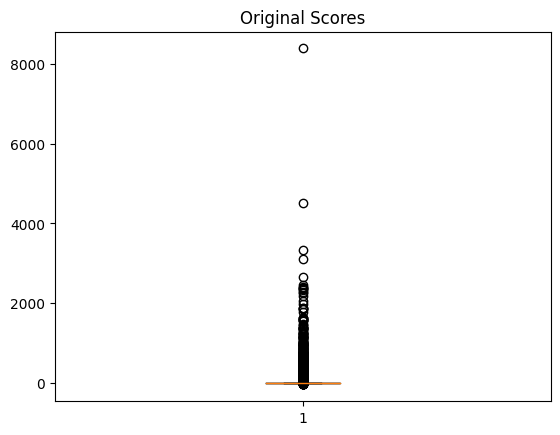

In [68]:
# an initial look at the scores makes it clear that there are some very extreme values...
fig1, ax1 = plt.subplots()
ax1.set_title('Original Scores')
ax1.boxplot(scores)

In [69]:
# median is 1, 75% is 3, but the max is 8384. let's see where it all goes wrong
answers_df['Score'].describe()

count    987122.000000
mean          3.028437
std          21.263246
min         -38.000000
25%           0.000000
50%           1.000000
75%           3.000000
max        8384.000000
Name: Score, dtype: float64

In [70]:
# using the IQR method to remove outliers. Instead of removing, will just replace with the limit
# IE) Scores greater than upper_limit will just be replaced with upper limit, same with lower limit.
# https://towardsdatascience.com/practical-implementation-of-outlier-detection-in-python-90680453b3ce

In [71]:
IQR = scores.quantile(0.75) - scores.quantile(0.25)
print(IQR)

3.0


In [72]:
scores_upper_limit = scores.quantile(0.75) + 3 * IQR
scores_lower_limit = scores.quantile(0.25) - 3 * IQR

In [41]:
# answers_df['Adjusted_Score'] = answers_df['Score'].copy(deep=True)

# answers_df[answers_df['Adjusted_Score'] > scores_upper_limit] = scores_upper_limit
# answers_df[answers_df['Adjusted_Score'] < scores_lower_limit] = scores_lower_limit

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe993b09d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe993b0f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe993b0700>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbedef1e550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbedef1e820>],
 'means': []}

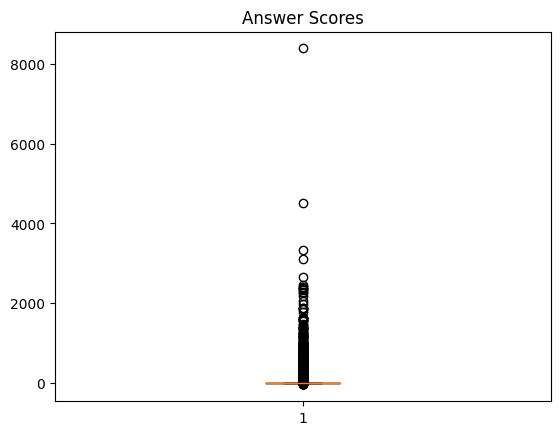

In [73]:
fig1, ax1 = plt.subplots()
ax1.set_title('Answer Scores')
ax1.boxplot(answers_df['Score'])

array([[<AxesSubplot:title={'center':'Score'}>]], dtype=object)

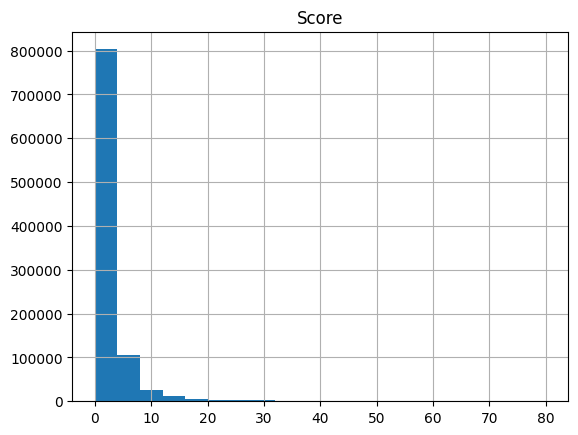

In [86]:
# Histogram view of the general distribution of the Score trait, among the answers
answers_df.hist(column="Score", bins=20, range=[0, 80])

In [87]:
# utility function, to just get the slice of the answers_df which matches the question ID
def get_question_answer_info(question_id):
    relevant_answers = answers_df.query(f"ParentId == {question_id}")
    scores = relevant_answers['Score']
    num_answers = len(scores)
    highest_score = np.max(scores)
    if num_answers == 0:
        highest_score = 0

    return highest_score, num_answers

In [88]:
# first insert empty columns, which we will rewrite shortly
questions_df.insert(6, "highest_answer_score", 0)
questions_df.insert(7, "num_answers", 0)

In [89]:
index = questions_df.index
for row_index in index:
    if row_index % 200000 == 0:
        print(row_index)
    question = questions_df.loc[row_index]
    question_id = question['Id']
    highest_score, num_answers = get_question_answer_info(question_id)
    questions_df.loc[row_index, ['highest_answer_score']] = highest_score
    questions_df.loc[row_index, ['num_answers']] = num_answers

0
200000
400000
600000


In [18]:
questions_df

,Id,OwnerUserId,CreationDate,Score,Title,Body,highest_answer_score,num_answers
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,12,4
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,9,2
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...,4,3
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...,4,1
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...,8,7
...,...,...,...,...,...,...,...,...
607277,40143190,333403.0,2016-10-19T23:36:01Z,1,How to execute multiline python code from a ba...,<p>I need to extend a shell script (bash). As ...,5,2
607278,40143228,6662462.0,2016-10-19T23:40:00Z,0,How to get google reCaptcha image source using...,<p>I understood that reCaptcha loads a new fra...,0,0
607279,40143267,4064680.0,2016-10-19T23:44:07Z,0,Updating an ManyToMany field with Django rest,<p>I'm trying to set up this API so I can use ...,0,0
607280,40143338,7044980.0,2016-10-19T23:52:27Z,2,Most possible pairs,"<p>Given a list of values, and information on ...",0,0


array([[<AxesSubplot:title={'center':'highest_answer_score'}>]],
      dtype=object)

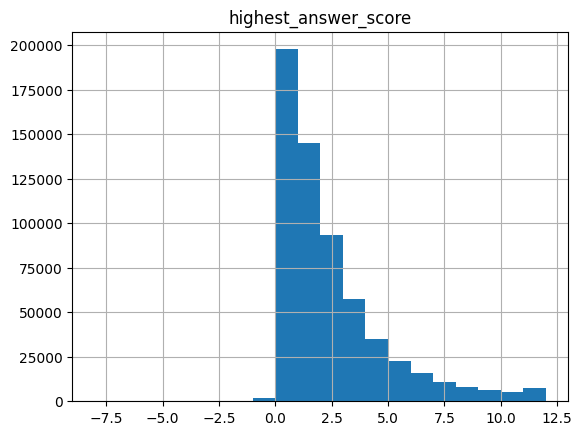

In [20]:
questions_df.hist(column="highest_answer_score", bins=20)

array([[<AxesSubplot:title={'center':'num_answers'}>]], dtype=object)

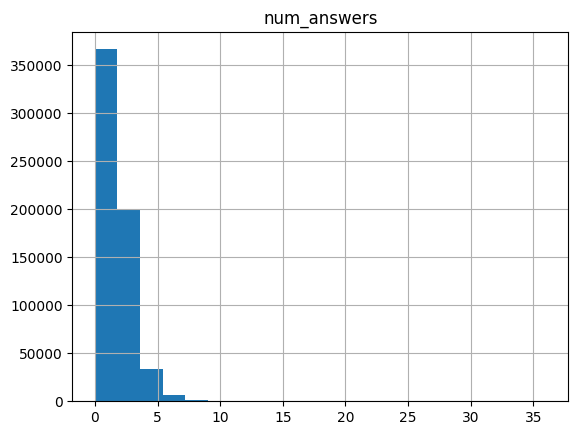

In [21]:
questions_df.hist(column="num_answers", bins=20)

In [23]:
questions_df['has_positive_answer'] = questions_df['highest_answer_score'] > 0

In [44]:
questions_df.head(5)

,Id,OwnerUserId,CreationDate,Score,Title,Body,highest_answer_score,num_answers,has_positive_answer
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,12,4,True
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,9,2,True
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...,4,3,True
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...,4,1,True
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...,8,7,True


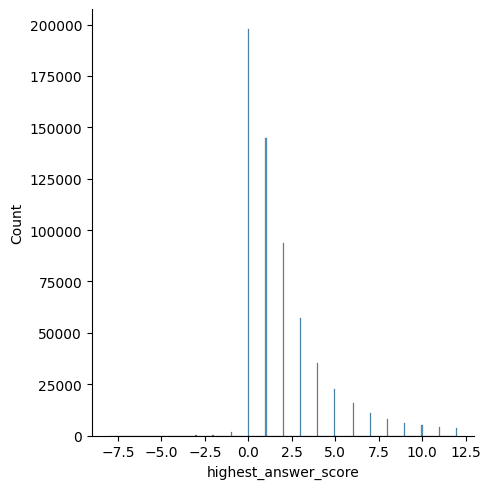

In [28]:
sns.displot(questions_df, x='highest_answer_score')

In [37]:
zero_score_count = np.sum(questions_df['highest_answer_score'] == 0)
zero_score_count

197684

In [33]:
total_count = questions_df.shape[0]
total_count

607282

In [39]:
positive_score_count = total_count - zero_score_count
positive_score_count

409598

In [41]:
# by nature, these would have scores of 0
unanswered_question_count = np.sum(questions_df['num_answers'] == 0)
unanswered_question_count

72267

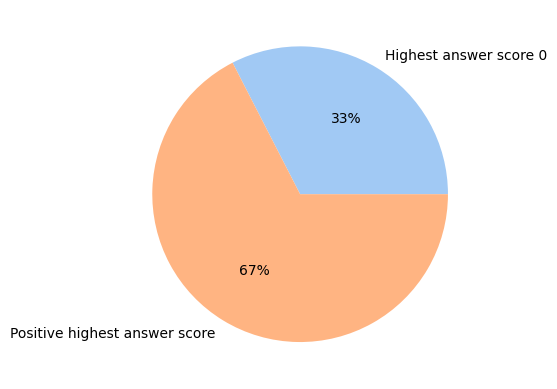

In [40]:
# take a look at the distribution of questions with positive answer score, and those with 0

data = [zero_score_count, positive_score_count]
labels = ['Highest answer score 0', "Positive highest answer score"]
colors = sns.color_palette('pastel')[0:2]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

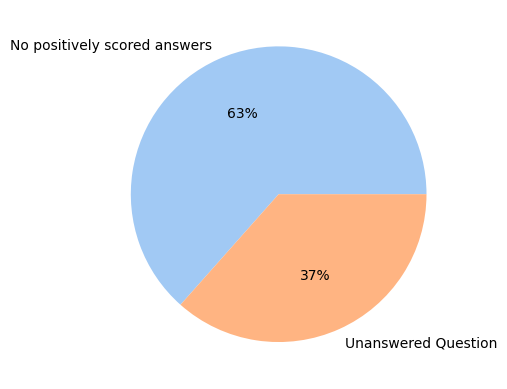

In [43]:
# take a look at of the quetsions with the highest answer score being 0, what proportion of those were because they
# just had received no answers

# seems like a good amount of them actually do have answers, just that the answers did not have good feedback.

data = [zero_score_count - unanswered_question_count, unanswered_question_count]
labels = ['No positively scored answers', "Unanswered Question"]
colors = sns.color_palette('pastel')[0:2]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [45]:
questions_df.to_csv('processed_questions.csv')